In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
data = pd.read_csv("Bengaluru_House_Data.csv")

In [74]:
df = data.copy()

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [76]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [77]:
df["area_type"].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

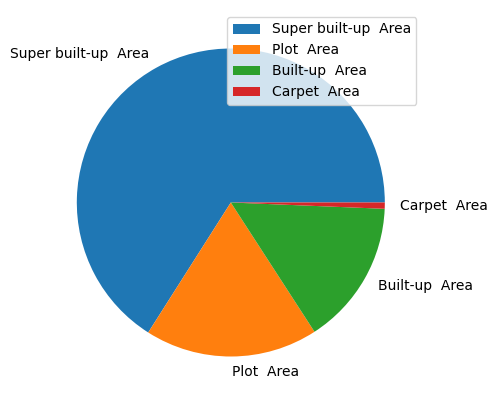

In [78]:
plt.figure(figsize=(5, 5))
lable = ["Super built-up  Area", "Plot  Area", "Built-up  Area", "Carpet  Area"]
plt.pie(df["area_type"].value_counts(), labels=lable)
plt.legend()
plt.show()

In [79]:
df["Super built-up"] = df["area_type"].apply(
    lambda x: 1 if "Super built-up  Area" in x else 0
)

In [80]:
df["Plot"] = df["area_type"].apply(lambda x: 1 if "Plot  Area" in x else 0)

In [81]:
df["Built-up"] = df["area_type"].apply(lambda x: 1 if "Built-up  Area" in x else 0)

In [82]:
df["Carpet"] = df["area_type"].apply(lambda x: 1 if "Carpet  Area" in x else 0)

In [83]:
df["availability"].unique()

array(['19-Dec', 'Ready To Move', '18-May', '18-Feb', '18-Nov', '20-Dec',
       '17-Oct', '21-Dec', '19-Sep', '20-Sep', '18-Mar', '20-Feb',
       '18-Apr', '20-Aug', '18-Oct', '19-Mar', '17-Sep', '18-Dec',
       '17-Aug', '19-Apr', '18-Jun', '22-Dec', '22-Jan', '18-Aug',
       '19-Jan', '17-Jul', '18-Jul', '21-Jun', '20-May', '19-Aug',
       '18-Sep', '17-May', '17-Jun', '21-May', '18-Jan', '20-Mar',
       '17-Dec', '16-Mar', '19-Jun', '22-Jun', '19-Jul', '21-Feb',
       'Immediate Possession', '19-May', '17-Nov', '20-Oct', '20-Jun',
       '19-Feb', '21-Oct', '21-Jan', '17-Mar', '17-Apr', '22-May',
       '19-Oct', '21-Jul', '21-Nov', '21-Mar', '16-Dec', '22-Mar',
       '20-Jan', '21-Sep', '21-Aug', '14-Nov', '19-Nov', '15-Nov',
       '16-Jul', '15-Jun', '17-Feb', '20-Nov', '20-Jul', '16-Sep',
       '15-Oct', '15-Dec', '16-Oct', '22-Nov', '15-Aug', '17-Jan',
       '16-Nov', '20-Apr', '16-Jan', '14-Jul'], dtype=object)

In [84]:
df["location"].unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [85]:
# pd.set_option("display.max_rows", None)
df["location"].value_counts()

location
Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: count, Length: 1305, dtype: int64

In [86]:
df["location"] = df["location"].fillna("other")

In [87]:
df["location"] = df["location"].apply(lambda x: x.strip())

In [88]:
df["size"].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', nan, '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [89]:
df.isnull().sum()

area_type            0
availability         0
location             0
size                16
society           5502
total_sqft           0
bath                73
balcony            609
price                0
Super built-up       0
Plot                 0
Built-up             0
Carpet               0
dtype: int64

In [90]:
df['size']=df['size'].fillna(df['size'].mode()[0])

In [91]:
# df = df.dropna(subset=["size"])

In [92]:
df["size"].isnull().sum()

0

In [93]:
df["Hall"] = df["size"].apply(lambda x: 1 if "BHK" in x else 0)
df["Kichan"] = df["size"].apply(lambda x: 1 if "BHK" in x else (1 if "RK" in x else 0))

df["Rooms"] = df["size"].apply(
    lambda x: (
        x.split()[0]
        if "BHK" in x
        else (x.split()[0] if "Bedroom" in x else (x.split()[0] if "RK" in x else 0))
    )
)

In [94]:
df['Hall'].unique()

array([1, 0], dtype=int64)

In [95]:
df['Kichan'].unique()

array([1, 0], dtype=int64)

In [96]:
df['Rooms'].unique()

array(['2', '4', '3', '6', '1', '8', '7', '5', '11', '9', '27', '10',
       '19', '16', '43', '14', '12', '13', '18'], dtype=object)

In [97]:
df["Rooms"] = df["Rooms"].astype("int64")

In [98]:
df["bath"] = df["bath"].fillna(df["Rooms"])

In [99]:
df['bath'].unique()

array([ 2.,  5.,  3.,  4.,  6.,  1.,  9.,  8.,  7., 11., 10., 14., 27.,
       12., 16., 40., 15., 13., 18.])

In [100]:
df.isnull().sum()

area_type            0
availability         0
location             0
size                 0
society           5502
total_sqft           0
bath                 0
balcony            609
price                0
Super built-up       0
Plot                 0
Built-up             0
Carpet               0
Hall                 0
Kichan               0
Rooms                0
dtype: int64

In [101]:
df['balcony'].unique()

array([ 1.,  3., nan,  2.,  0.])

In [102]:
df["balcony"].value_counts()

balcony
2.0    5113
1.0    4897
3.0    1672
0.0    1029
Name: count, dtype: int64

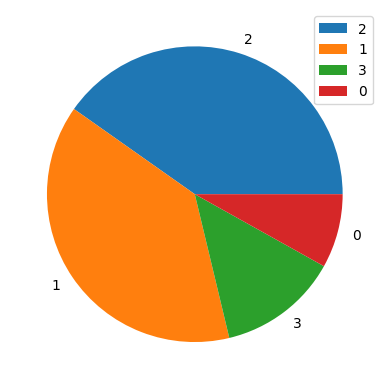

In [103]:
lable = ["2", "1", "3", "0"]
plt.pie(df["balcony"].value_counts(), labels=lable)
plt.legend()
plt.show()

In [104]:
df["balcony"].median()

2.0

In [105]:
df["balcony"] = df["balcony"].fillna(df["balcony"].median()).astype("int64")

In [106]:
df["total_sqft"].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [107]:
# def convert_sqft_tonum(x):
#     temp = x.split("-")
#     if len(temp) == 2:
#         return (float(temp[0]) + float(temp[1])) / 2
#     try:
#         return float(x)
#     except:
#         None

In [108]:
# df["total_sqft"] = data["total_sqft"].apply(convert_sqft_tonum)

In [109]:
df["total_sqft"] = df["total_sqft"].apply(
    lambda x: (
        int((float(x.split("-")[0]) + float(x.split("-")[1])) / 2) if "-" in x else x
    )
)

In [110]:
df["total_sqft"].shape

(13320,)

In [111]:
df["total_sqft"] = pd.to_numeric(df["total_sqft"], errors="coerce")

In [112]:
df = df.dropna(subset=["total_sqft"])

In [113]:
# t = df['total_sqft'].apply(lambda x:x if '-' in x else None)

In [114]:
# df[df['total_sqft'] == t]

In [115]:
df["total_sqft"].value_counts()

total_sqft
1200.0    843
1100.0    221
1500.0    206
2400.0    196
600.0     180
         ... 
785.0       1
2401.0      1
3073.0      1
3550.0      1
4689.0      1
Name: count, Length: 1954, dtype: int64

In [116]:
df.isnull().sum()

area_type            0
availability         0
location             0
size                 0
society           5472
total_sqft           0
bath                 0
balcony              0
price                0
Super built-up       0
Plot                 0
Built-up             0
Carpet               0
Hall                 0
Kichan               0
Rooms                0
dtype: int64

In [117]:
df["total_sqft"].info()

<class 'pandas.core.series.Series'>
Index: 13274 entries, 0 to 13319
Series name: total_sqft
Non-Null Count  Dtype  
--------------  -----  
13274 non-null  float64
dtypes: float64(1)
memory usage: 207.4 KB


In [118]:
# df.loc[:, "price"] = pd.to_numeric(df["price"], errors="coerce").astype("int64")

In [119]:
# df.loc[:, "price"] = (df["price"]*100000) / df['total_sqft']

In [120]:
# df["price"] = (df["price"] * 100000) / df["total_sqft"]

In [121]:
df.head(3)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,Super built-up,Plot,Built-up,Carpet,Hall,Kichan,Rooms
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056.0,2.0,1,39.07,1,0,0,0,1,1,2
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600.0,5.0,3,120.00,0,1,0,0,0,0,4
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440.0,2.0,3,62.00,0,0,1,0,1,1,3


In [122]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price', 'Super built-up', 'Plot',
       'Built-up', 'Carpet', 'Hall', 'Kichan', 'Rooms'],
      dtype='object')

In [123]:
df.head(3)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,Super built-up,Plot,Built-up,Carpet,Hall,Kichan,Rooms
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056.0,2.0,1,39.07,1,0,0,0,1,1,2
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600.0,5.0,3,120.00,0,1,0,0,0,0,4
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440.0,2.0,3,62.00,0,0,1,0,1,1,3


In [124]:
df = df.drop(columns=["area_type", "availability", "size", "society"])

In [125]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [126]:
df.columns

Index(['location', 'total_sqft', 'bath', 'balcony', 'price', 'Super built-up',
       'Plot', 'Built-up', 'Carpet', 'Hall', 'Kichan', 'Rooms'],
      dtype='object')

In [127]:
x = df[
    [
        "location",
        "total_sqft",
        "bath",
        "balcony",
        "Super built-up",
        "Plot",
        "Built-up",
        "Carpet",
        "Hall",
        "Kichan",
        "Rooms",
    ]
]
y = df["price"]

In [128]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.20, random_state=42
)

In [129]:
x_train.shape, y_train.shape

((10619, 11), (10619,))

In [130]:
ohe = OneHotEncoder()

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13274 entries, 0 to 13319
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        13274 non-null  object 
 1   total_sqft      13274 non-null  float64
 2   bath            13274 non-null  float64
 3   balcony         13274 non-null  int64  
 4   price           13274 non-null  float64
 5   Super built-up  13274 non-null  int64  
 6   Plot            13274 non-null  int64  
 7   Built-up        13274 non-null  int64  
 8   Carpet          13274 non-null  int64  
 9   Hall            13274 non-null  int64  
 10  Kichan          13274 non-null  int64  
 11  Rooms           13274 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1.3+ MB


In [132]:
ohe.fit(x[["location"]])

OneHotEncoder()

In [133]:
colums_trans = make_column_transformer(
    (OneHotEncoder(categories=ohe.categories_), ["location"]),
    remainder="passthrough",
)

In [134]:
lr = LinearRegression()

In [135]:
cols_pipe = make_pipeline(colums_trans, lr)

In [136]:
print(df.columns)

Index(['location', 'total_sqft', 'bath', 'balcony', 'price', 'Super built-up',
       'Plot', 'Built-up', 'Carpet', 'Hall', 'Kichan', 'Rooms'],
      dtype='object')


In [137]:
df.isnull().sum()

location          0
total_sqft        0
bath              0
balcony           0
price             0
Super built-up    0
Plot              0
Built-up          0
Carpet            0
Hall              0
Kichan            0
Rooms             0
dtype: int64

In [138]:
cols_pipe.fit(x_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['1 Annasandrapalya', '1 Giri Nagar', '1 Immadihalli', ...,
       'vinayakanagar', 'white field,kadugodi', 'whitefiled'],
      dtype=object)]),
                                                  ['location'])])),
                ('linearregression', LinearRegression())])

In [139]:
y_pred = cols_pipe.predict(x_test)

In [140]:
y_pred


array([115.46245947, 137.86547797,  74.54321926, ...,  12.12508181,
        70.6410778 , 368.62827788])

In [141]:
y_test

4634      85.00
10625    160.00
4259      65.00
6014     150.00
9995     100.00
          ...  
2226      55.50
10582     40.00
11791     35.00
11611     70.44
9458     615.00
Name: price, Length: 2655, dtype: float64

In [142]:
r2_score(y_test,y_pred)

0.545504189760281